<a href="https://colab.research.google.com/github/tkeldenich/Linear_Regression_How_to_do_with_Keras/blob/main/Linear_Regression_How_to_do_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression How to do with Keras – Best Tutorial**

*   [English Article](https://inside-machinelearning.com/en/how-to-do-linear-regression-with-keras/)
*   [French Article](https://inside-machinelearning.com/comment-faire-une-regression-lineaire-avec-keras/)

In this article we see how to do the basis of Machine Learning: **Linear Regression !** For this we will use the Keras library.

**But first, what is a linear regression?**

Linear regression is an approach to solve a problem.

Let’s take an example.

We have gathered data on a whole population:

* **the age** of each individual
* their **health** insurance charges

If we display this data on a graph, here is the result:

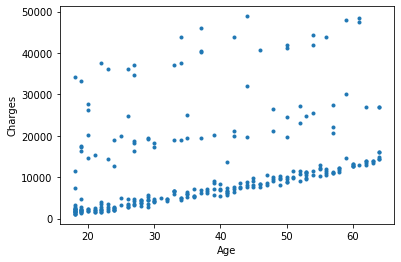

This is called a **points cloud.**

Here, the goal of linear regression is to find a mathematical relationship between age and insurance charges for that population.

An example of a relationship would be: **as an individual’s age increases, so do their health insurance charges.**


This relationship must be **linear**, i.e. it must be explained as an equation y = ax+b.

x being the age of the individual and y being the insurance charges.

Here is an example of a linear regression (orange line):

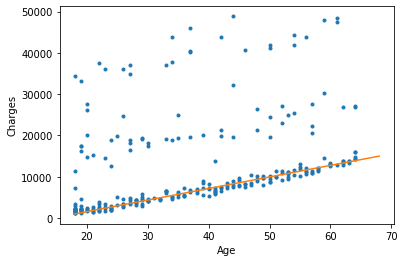

The above equation is : *y = 280x-4040*

If an individual is 20 years old, his expenses are equal to 280*20-4040 = 1560

**However, this does not work for all individuals.**

You can see on the graph that the orange line (linear regression) does NOT pass through all the points.

**The linear regression does not give a perfect solution for the problem.** It does not predict all the points.

**BUT, it gives an optimal solution.**

Optimal because we can predict **most of the points** with this linear regression.

This makes it a fast solution and adapted to many problems.

**Let’s get to Deep Learning with Keras !**

## **Multiple Linear Regression**

In a classical linear regression, we take **one data** (age) to explain **another** (insurance charges).

But in Deep Learning, the operation is often more challenging.


In our case we’ll have to take **multiple data** to explain **another one.**

Let’s start by importing the dataset:

In [ ]:
!git clone https://github.com/tkeldenich/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 18 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


We can read it with the Pandas library:

In [ ]:
import pandas as pd

df = pd.read_csv('datasets/insurance.csv') 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


*Source du dataset : [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance)*

The objective in this problem is to use **the age, gender, BMI, number of children, smoking and region of residence** (prediction data) of individuals to predict their **health insurance charges** (prediction data).

This is called **Multiple Linear Regression** because we take **multiple variables** to explain **another one.**

Many of these data are **categorical variables.**

For example, **gender** has two options:

* male
* female

Instead of having this data in text form, let’s turn it into **numbers**:

* 0
* 1

We apply this transformation by putting the result in a new variable X :

In [ ]:
X = pd.DataFrame()
df.sex = pd.Categorical(df.sex)

X['sex'] = df.sex.cat.codes

We display the result:

In [ ]:
X.head()

,sex
0,0
1,1
2,1
3,1
4,1


The transformation categorical **text** => categorical **numbers** works.

Let’s apply it to the rest of our **categorical data:**

In [ ]:
df.smoker = pd.Categorical(df.smoker)
df.region = pd.Categorical(df.region)

X['smoker'] = df.smoker.cat.codes
X['region'] = df.region.cat.codes

We now have all our categorical data in the variable X.

Let’s transfer the rest of the prediction data into this same variable:

In [ ]:
X['age'] = df['age']
X['bmi'] = df['bmi']

We now have all our prediction data in the variable X. Let’s display them:

In [ ]:
X.head()

,sex,smoker,region,age,bmi
0,0,1,3,19,27.900
1,1,0,2,18,33.770
2,1,0,2,28,33.000
3,1,0,1,33,22.705
4,1,0,1,32,28.880


### **X_train, X_test, Y_train, Y_test**

All we need now is the data to predict **Y** :

In [ ]:
Y = df['charges']

We have the **X** and the **Y**.

We can now separate the **training** and **test** data :

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

Our data is ready!

We can get down to business with **Deep Learning.**

**IMPORTANT**: *If you don’t understand what X and Y data and/or training and test data are, I invite you to read [this introduction article to Keras.*](https://inside-machinelearning.com/en/first-projec-keras/)

## **Linear Regression Model with Keras**

To do a Multiple Linear Regression with Keras, we need to import :

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

The Dropout layer is not essential but I use it here to improve the performance of my model.

If you are a beginner you can try with **two simple Dense layers**, like this:


```
model.add(Dense(64, input_dim = 5, activation = ‘relu’))
model.add(Dense(1))
```

And add layers as you **go along.**

Keep in mind that the **essential thing about this Linear Regression model** is that it ends with a Dense layer with a single neuron and no activation function.

**The absence of an activation function** allows it to have values between **-∞ and +∞.**

If it ended with a sigmoid activation function, the result values would be between 0 and 1.


**This is not good**, the insurance charges can exceed 1 ($) by far, **we need an unbounded result.**

That’s why we choose NOT to take an activation function for the last layer.

Here is the model I use:

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 5, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(54, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1))

We compile :

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

For the compilation⬆ the linear regression gives us a last constraint: the loss function must be the **Mean Squared Error.**

It allows us to calculate the error between our prediction and the actual result.

The error is a kind of **distance** between our two data.

**The more the prediction is far from the real result, the more the model must improve.**

Another thing, for the metrics I chose to display here the mse (**Mean Squared Error**) and the mae (**Mean Absolute Error**).

With each of this two error, we can see how results evolve.

The idea is that the more the model is optimized, the more the error should decrease.

### **Training**

We can train the model :

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=200)

Epoch 1/200
27/27 [==============================] - 5s 61ms/step - loss: 327354016.0000 - mse: 327354016.0000 - mae: 13437.3311 - val_loss: 311034752.0000 - val_mse: 311034752.0000 - val_mae: 12642.7451
Epoch 2/200
27/27 [==============================] - 0s 18ms/step - loss: 312698048.0000 - mse: 312698048.0000 - mae: 12920.6406 - val_loss: 277125632.0000 - val_mse: 277125632.0000 - val_mae: 11329.5576
Epoch 3/200
27/27 [==============================] - 0s 17ms/step - loss: 226802848.0000 - mse: 226802848.0000 - mae: 9822.6895 - val_loss: 145255328.0000 - val_mse: 145255328.0000 - val_mae: 7649.0239
Epoch 4/200
27/27 [==============================] - 1s 20ms/step - loss: 140952320.0000 - mse: 140952320.0000 - mae: 9482.2607 - val_loss: 135090704.0000 - val_mse: 135090704.0000 - val_mae: 8801.4463
Epoch 5/200
27/27 [==============================] - 1s 27ms/step - loss: 133649296.0000 - mse: 133649296.0000 - mae: 8777.1680 - val_loss: 134685136.0000 - val_mse: 134685136.0000 - val_m

Here we see the MSE and the MAE results.

Both evolve in a similar way. When one increases, the other increases. When one decreases, the other decreases.

So we have the **same information** on these two metrics.

BUT, I prefer to look at the **MAE score.** The latter being much closer to our **insurance charges values.**

Let me explain.

Looking at the MSE on the last line, we see 28,009,306. **This score makes no sense to us.** None of our variables seem to be related to a score that high. On the other hand it makes sense for the Deep Learning model which uses it to optimize itself!

However, looking at the MAE on the last line, we see 3.299,4. **This score makes a lot more sense!** It seems to be related to our insurance expense data.

We have to interpret the MAE as follows: if the score is 3.299,4 it means that when we predict the insurance charges of an individual, the average error is 3.299,4.

For example, Mr. Paul, 33 years old, is predicted to have insurance charges of $13,299.4 when the actual value is $10,000.

**This score predicted is relatively close to the actual value.**

The goal is to minimize this distance.

**What to remember:** MSE is used by the algorithm to optimize itself, MAE is used by the Data Scientist/Engineer/etc to measure the model performance.

Let’s go further into the analysis of the result!



## **Understanding the results with KPIs**

Let’s start by displaying the evolution of the MAE during the training:

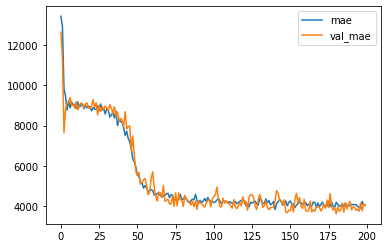

In [ ]:
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()

The evolution is good, there is no unusual event, the decrease is regular and the validation values follows the training values.

*Once again, if you don’t understand the analysis of this curve, I invite you to see this article on [the basics of Deep Learning with Keras.](https://inside-machinelearning.com/en/first-projec-keras/)*

Now we want to analyze our model on data that it has never seen before: the test data…

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose = 0)

print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  26380084.0
Mean Absolute Error :  3479.411376953125


Here once again, I am only interested in the MAE.

The result seems good ! There is only a slight difference between the result on the training data (3.299,4) and the test data (4.095,5).

### **R2 score**

We’ll use a last measure to really get an idea of the result of the model.

First we retrieve **all the predictions** on the test data:

In [ ]:
Y_pred = model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


Then we **compare them to the real data.**

For this we use the **R2 score.**

The R2 Score gives us an **accuracy rate.**

**The advantage** compared to the MAE is that it gives us a much **clearer objective.**

With the MAE the objective is to get **closer to 0.** But in our case an error of 100, 500, 1,000, even 3,000$ is **acceptable.**

For example, if we predict Mrs. Lapie’s insurance charges to be $46,000 when they are actually $45,000, the error is minimal.

This is because: **the higher the insurance charges, the less impact the error has.**

If, on the other hand, the objective is to predict **the price of a $3 pen** and the error is $1,000… there is a big problem.

In fact, the MAE must be considered **according to the value scale of Y.**

The MAE must tend to zero. **But if the goal is high, the MAE can be considered good even when it is high.**

With the MAE, one must have in mind the scale of values of Y.

**But with the R2 score, there is no need of it!**

**The R2 score, gives results that naturally conform to the Y value scale.**

It gives us a precision rate.

We calculated it with the SKLearn library:

In [ ]:
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(Y_test, Y_pred))

r2 score:  0.8129731591768139


Our precision is 81%, it’s an acceptable precision but it can be improved !

Here, we can decide that : getting a result close to 85% / 90% is a good score.

## **Understanding the results visually**

Let’s finish with the interpretation of the results without metrics, **only visually.**

First we can see the results 1 by 1:

In [ ]:
Y_pred[:5]

array([[ 7139.907],
       [12737.577],
       [ 9068.941],
       [30142.662],
       [13432.189]], dtype=float32)

And compare them to the real values:

In [ ]:
Y_test.head()

485      4347.02335
1069    10928.84900
268      7441.05300
1304    21259.37795
862     12269.68865
Name: charges, dtype: float64

I let you analyze by yourself these results, you can put your **answer in comments.**

Then, the most interesting part because the most visual!

Let’s display each of the predicted values according to the real values:

9/9 [==============================] - 0s 3ms/step


[]

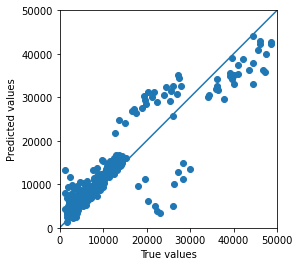

In [ ]:
Y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_test, Y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 50000])
plt.ylim([0, 50000])
plt.plot([0, 50000], [0, 50000])
plt.plot()

Here we have a central line.

**The closer the points are to the line, the better the prediction.**

Why?

Because a point is on the line when the predicted value is **equal** to the actual value.

For example, if the predicted value is 10.000 and the actual value is also 10.000, the point will be exactly on the line.

**The more the points are close to the line, the more accurate the model is.**

Here we see only few points being very far from the line. **This means that the model has a good accuracy.**

## **Conclusion**

Remember that to perform a (Multiple) Linear Regression:

* Transform your **textual** categorical data into **numbers**
* Do not set **an activation function** in the last layer of your model
* Use the **Mean Squared Error** (mse) in **loss**
* Use the **Mean Absolute Error** (mae) in **metrics**
* **R2 score** will allow you to have a clear optimization objective
* Displaying the predicted data as a function of the actual data allows you to **visually analyze your results**

Now you just have to **optimize your model!**

We explain **the right techniques** in the following articles:

* [Normalize your data](https://inside-machinelearning.com/en/normalize-your-data/)
* [Cross-Validation](https://inside-machinelearning.com/en/cross-validation-tutorial/)
* [Changing model hyperparameters](https://inside-machinelearning.com/en/decision-tree-and-hyperparameters/)

See you soon on Inside Machine Learning! 🔥